In [1]:
using StatsPlots
using Serialization
using DataFrames

In [2]:
data = deserialize("../../data/bitrates/1/sfd_noisy.jls");
names(data)

14-element Vector{String}:
 "noise_rate"
 "kind"
 "nwalkers"
 "nsites"
 "nsteps"
 "true_bits"
 "m0_bits"
 "m1_bits"
 "m2_bits"
 "m3_bits"
 "m0_plugin"
 "m1_plugin"
 "m2_plugin"
 "m3_plugin"

In [11]:
function plot_rates(data, noiserate)
    subdata = filter(x -> x.noise_rate == noiserate, data)
    subdata = filter(x -> x.nwalkers == 7, subdata)
    subdata = filter(x -> x.kind == "direct", subdata)
    sort!(subdata)
    #println(subdata)
    p1 = plot(legend=:bottomright, title="$(noiserate) Noise", xlabel="Number of Sites", ylabel="")
    #plot!(p1, subdata.nsites, subdata.m0_bits ./ subdata.nsteps, label="Independent")
    plot!(p1, subdata.nsites, subdata.m1_bits ./ subdata.nsteps, label="1-Markov")
    plot!(p1, subdata.nsites, subdata.m2_bits ./ subdata.nsteps, label="2-Markov")
    plot!(p1, subdata.nsites, subdata.true_bits ./ subdata.nsteps, label="True")

    plot!(p1, subdata.nsites, subdata.m1_plugin, label="Hist 1-Markov")
    plot!(p1, subdata.nsites, subdata.m2_plugin, label="Hist 2-Markov")
    plot!(p1, subdata.nsites, subdata.m3_plugin, label="Hist 3-Markov")
end

plot_rates (generic function with 1 method)

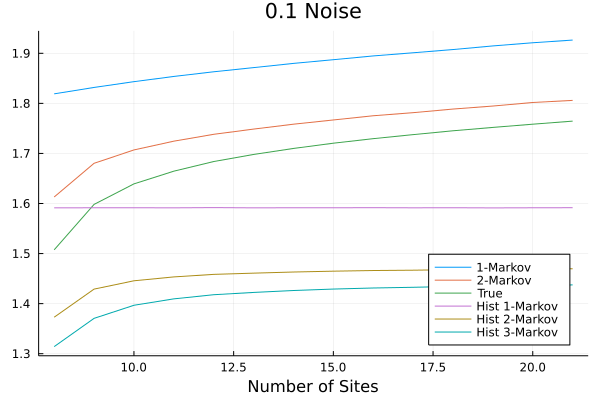

In [14]:
plot_rates(data, 1e-1)